In [2]:
!unzip "/content/drive/MyDrive/archive.zip" -d "//content/drive/MyDrive/animals"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/animal-africa-wilderness-zoo.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-1128798__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-171217__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-223734__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-2268955__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-2412554__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-3099722__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-322310__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-3475778__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-4096056__340.jpg  
  inflating: //content/drive/MyDrive/animals/Animals/Cheetah/cheetah-4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import random
from albumentations import *
from tqdm import tqdm

In [6]:
AUG = [ HorizontalFlip, ShiftScaleRotate, RandomRotate90, RandomBrightnessContrast,
        Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, ]
print(len(AUG))

9


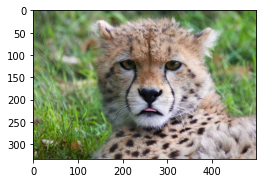

In [8]:
path0="/content/drive/MyDrive/animals/Animals/Cheetah/animal-africa-wilderness-zoo.jpg"
image0c=cv2.imread(path0)
aug=AUG[0](p=1)
image2c=aug(image=image0c)['image']
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image2c,cv2.COLOR_BGR2RGB))
plt.show()

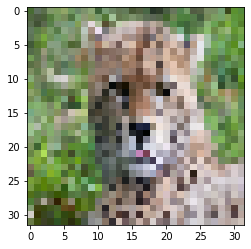

In [9]:
image0a=load_img(path0, grayscale=False, color_mode='rgb', target_size=(32,32))
image1a=np.asarray(image0a)
aug=AUG[0](p=1)
image2a=aug(image=image1a)['image']
plt.figure(figsize=(4,4))
plt.imshow(image2a)
plt.show()

In [13]:
data_dir = '/content/drive/MyDrive/animals/Animals'

In [14]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
print(Name)
print(len(Name))

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']
5


In [15]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [16]:
dataset=[]
datalabel=[]
count=0
for file in tqdm(os.listdir(data_dir)):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image0=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image1=np.asarray(image0)
        for i in range(len(AUG)):
            aug=AUG[i](p=1)
            image2=aug(image=image1)['image']       
            image3=image2/255.0
            if image3.sum()>20:
                dataset+=[image3]
                datalabel+=[count]        
    count=count+1


100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


In [17]:
m=len(dataset)
print(m)
M=[]
for i in range(m):
    M+=[i]
random.seed(2021)
random.shuffle(M)

trainX=np.array(dataset)[M[0:(m//4)*3]]
testX=np.array(dataset)[M[(m//4)*3:]]
trainY=np.array(datalabel)[M[0:(m//4)*3]]
testY=np.array(datalabel)[M[(m//4)*3:]]

1530


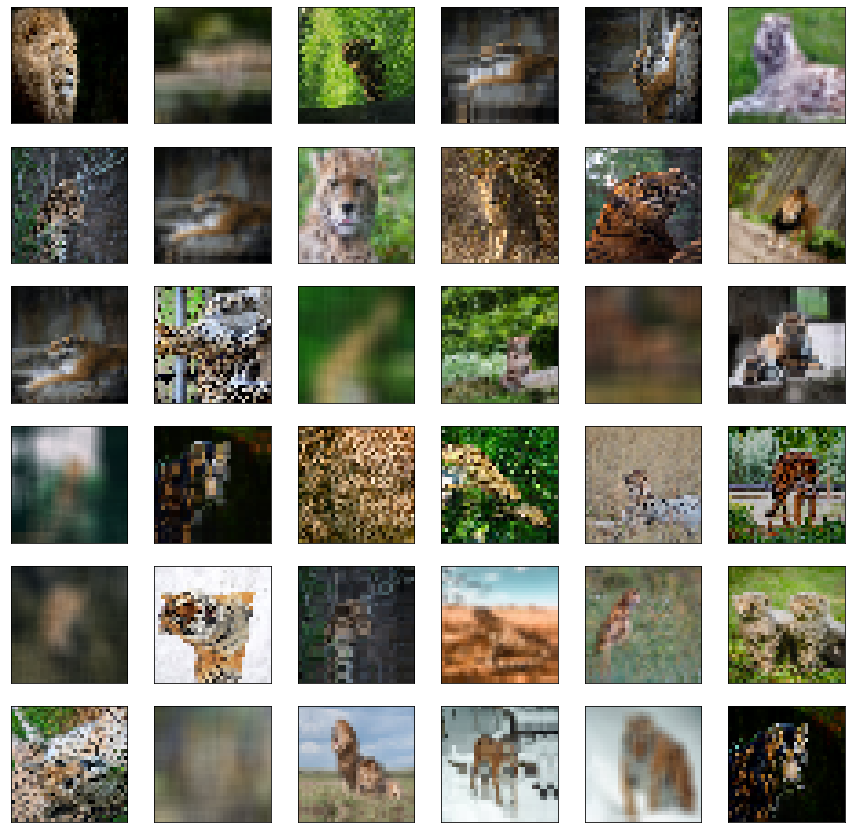

In [18]:
fig,axs = plt.subplots(6,6,figsize=(15,15))
for i in range(36):
    image=dataset[M[i]]
    r=i//6
    c=i%6
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    ax=axs[r][c].imshow(image)
plt.show()

In [19]:
trainlabels1=to_categorical(trainY)
trainlabels=np.array(trainlabels1)

In [20]:
trainx,testx,trainy,testy=train_test_split(trainX,trainlabels,test_size=0.2,random_state=44)

In [21]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(916, 32, 32, 3)
(230, 32, 32, 3)
(916, 5)
(230, 5)


In [22]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [23]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(32,32,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 0s 0us/step


In [24]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(5, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=40)

Epoch 1/40
29/29 [==============================] - 2s 86ms/step - loss: 0.5914 - accuracy: 0.7806 - val_loss: 0.6382 - val_accuracy: 0.7348
Epoch 2/40
29/29 [==============================] - 2s 52ms/step - loss: 0.5946 - accuracy: 0.7773 - val_loss: 0.6160 - val_accuracy: 0.7696
Epoch 3/40
29/29 [==============================] - 2s 55ms/step - loss: 0.5725 - accuracy: 0.7849 - val_loss: 0.5543 - val_accuracy: 0.7826
Epoch 4/40
29/29 [==============================] - 2s 54ms/step - loss: 0.5344 - accuracy: 0.8111 - val_loss: 0.5883 - val_accuracy: 0.7870
Epoch 5/40
29/29 [==============================] - 1s 50ms/step - loss: 0.5347 - accuracy: 0.8068 - val_loss: 0.6035 - val_accuracy: 0.7478
Epoch 6/40
29/29 [==============================] - 2s 56ms/step - loss: 0.5577 - accuracy: 0.7828 - val_loss: 0.5521 - val_accuracy: 0.8000
Epoch 7/40
29/29 [==============================] - 1s 50ms/step - loss: 0.5802 - accuracy: 0.7915 - val_loss: 0.5854 - val_accuracy: 0.7826
Epoch 8/40
29

In [40]:
testlabels1=to_categorical(testY)
testlabels=np.array(testlabels1)

In [41]:
y_pred=model.predict(testX)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testlabels,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        91
           1       0.88      0.85      0.86        75
           2       0.72      0.72      0.72        64
           3       0.87      0.88      0.87        75
           4       0.89      0.84      0.86        79

    accuracy                           0.83       384
   macro avg       0.83      0.82      0.83       384
weighted avg       0.83      0.83      0.83       384



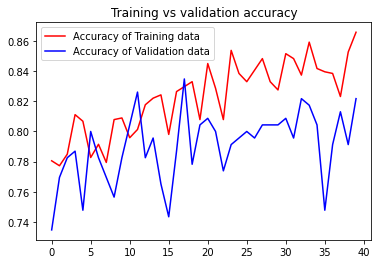

<Figure size 432x288 with 0 Axes>

In [42]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

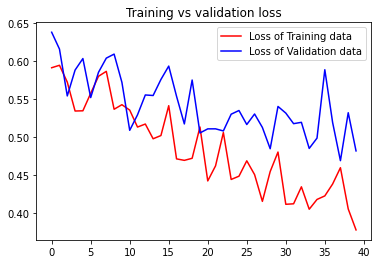

<Figure size 432x288 with 0 Axes>

In [43]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

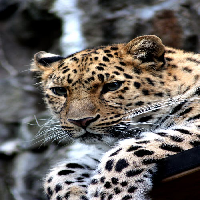

In [44]:
path0="/content/drive/MyDrive/animals/Animals/Leopard/leopard-animal-cat-cheetah-51129.jpeg"
load_img(path0,target_size=(200,200))

In [45]:
image=load_img(path0,target_size=(32,32))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.expand_dims(image, axis=0)
print(prediction_image.shape)

(1, 32, 32, 3)


In [46]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=reverse_mapping[value]
print("Prediction is {}.".format(move_name))

Prediction is Leopard.


In [47]:
pred2=model.predict(testX)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

[3, 4, 1, 0, 4, 4, 0, 3, 3, 0]


In [48]:
ANS=list(testY)
print(ANS[0:10])

[3, 2, 1, 0, 4, 4, 0, 3, 3, 0]


In [49]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.828125
